# SmartBeds - Análisis de componentes principales

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plt
import mpl_toolkits.mplot3d #Matplotlib 3d
import pickle as pk #Pikcle as pk
import gc #Garbage colector

### Lectura de datos

In [2]:
with open('datos.pdd','rb') as f:
    datos = pk.load(f)
    
with open('datosE.pdd','rb') as f:
    dataE = pk.load(f)

### Componentes principales

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#### Datos Brutos

In [4]:
data = datos.iloc[:,1:13]
pcaB = PCA(n_components=2).fit_transform(data)

/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/decomposition/pca.py:535: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Text(0.5, 1.0, 'PCA Raw')

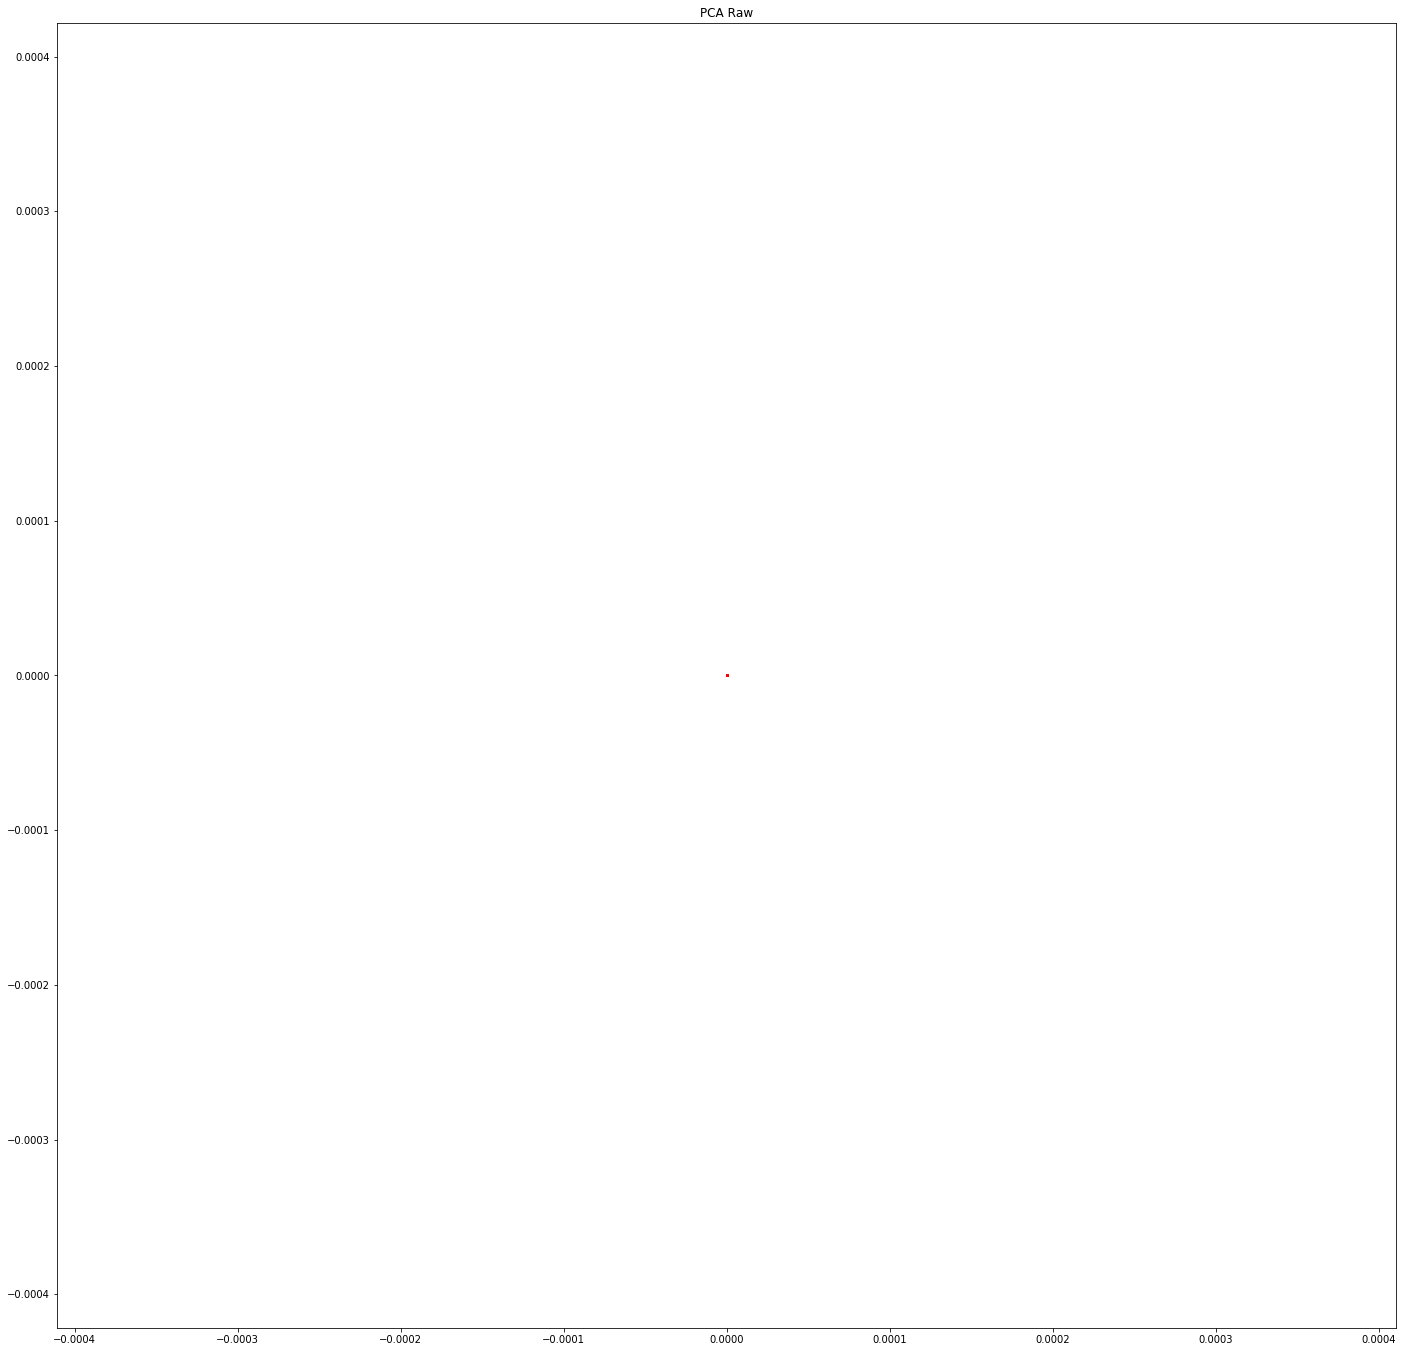

In [5]:
plt.figure(figsize=(24,24))
pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('PCA Raw')

#### Datos Estadísticos Móviles

In [ ]:
datosE = dataE
datosE = datosE.iloc[:,14:]
medias = datosE.iloc[:,0:12]
desv = datosE.iloc[:,12:]

datosEs = MinMaxScaler().fit_transform(datosE)
datosE.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,P9 mean,P10 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
4041041,0.12,10.56,11.28,9.44,1.84,1.04,1.52,0.0,0.0,0.0,...,3.736308,2.844293,0.553775,0.611010,0.653197,0.0,0.0,8.130469e-08,0.331662,3.441276e-08
4041042,0.24,11.20,12.00,9.96,1.84,0.96,1.52,0.0,0.0,0.0,...,5.000000,3.791218,0.553775,0.611010,0.653197,0.0,0.0,8.130469e-08,0.374166,3.441276e-08
4041043,0.36,11.80,12.64,10.48,1.80,0.92,1.44,0.0,0.0,0.0,...,5.822943,4.482559,0.577350,0.640312,0.711805,0.0,0.0,8.130469e-08,0.408248,3.441276e-08
4041044,0.52,12.44,13.36,11.04,1.84,0.88,1.44,0.0,0.0,0.0,...,6.550318,5.119245,0.624500,0.665833,0.711805,0.0,0.0,8.130469e-08,0.408248,3.441276e-08
4041045,0.68,13.08,14.12,11.60,1.88,0.84,1.44,0.0,0.0,0.0,...,7.212951,5.627314,0.665833,0.687992,0.711805,0.0,0.0,8.130469e-08,0.408248,3.441276e-08


In [ ]:
pcaM = PCA(n_components=2).fit_transform(medias)
pcaD = PCA(n_components=2).fit_transform(desv)
pcaMD = PCA(n_components=2).fit_transform(datosEs)

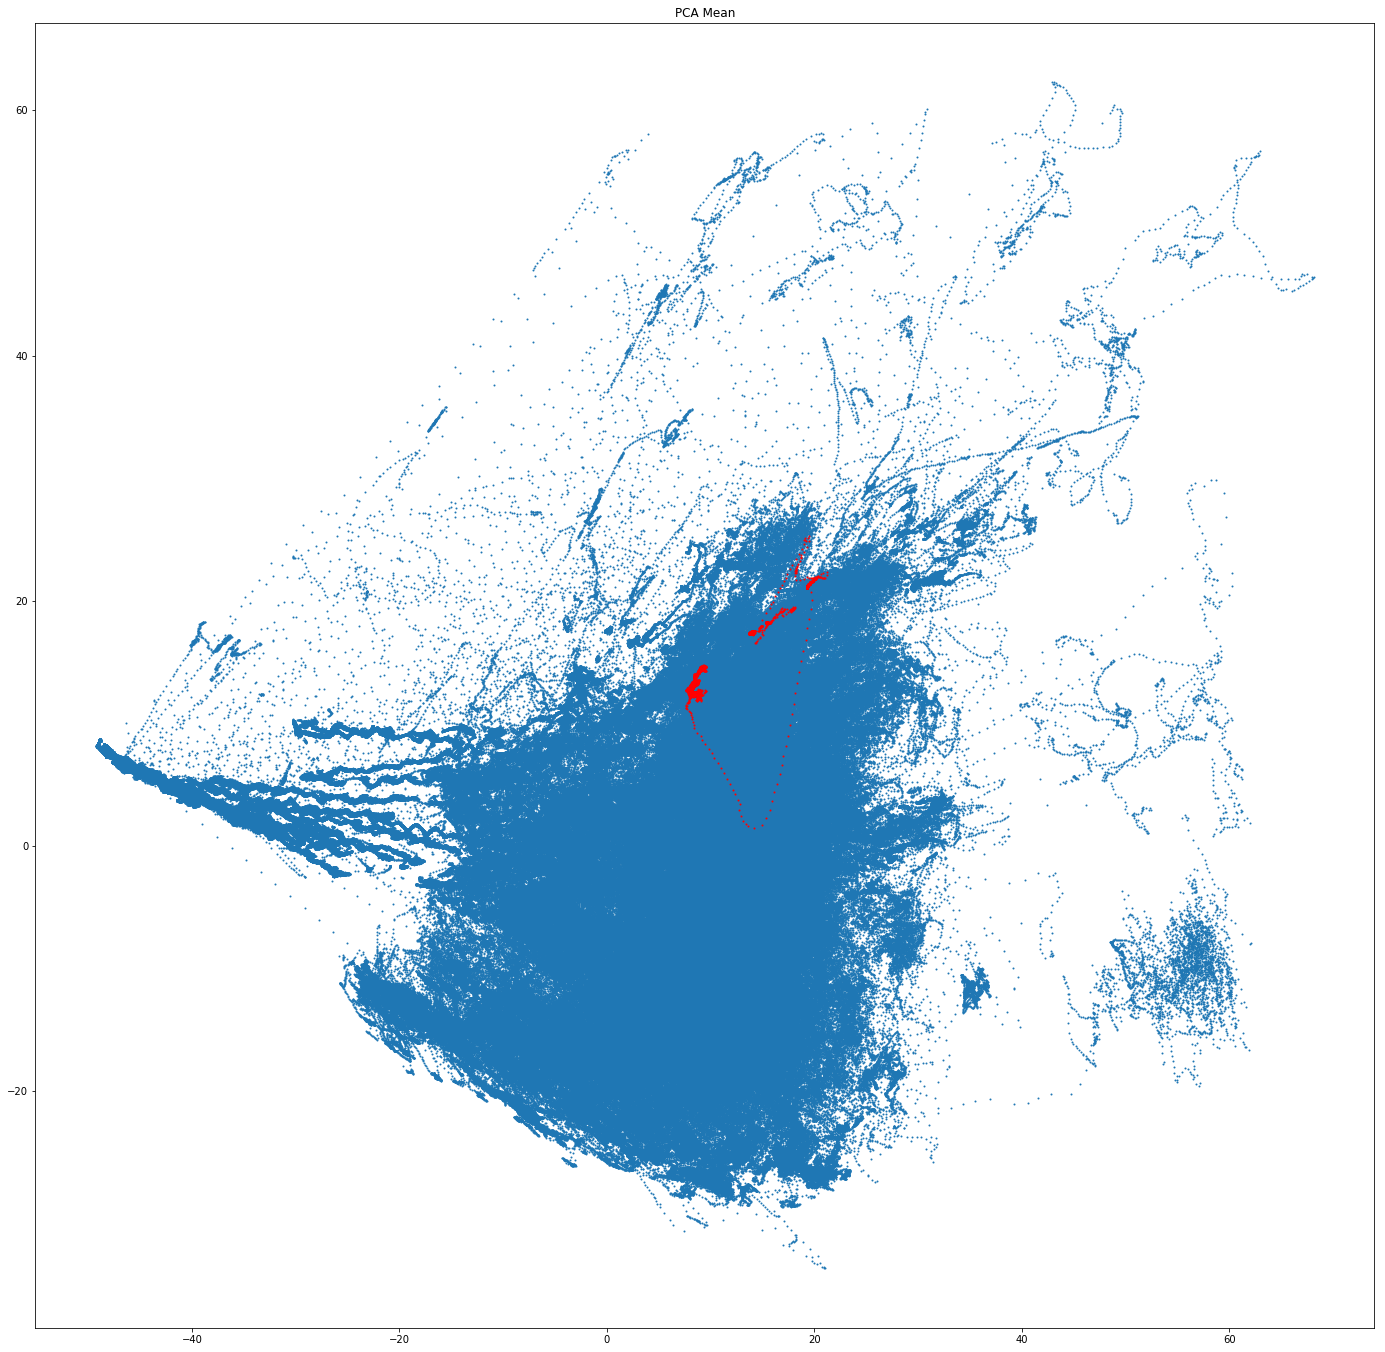

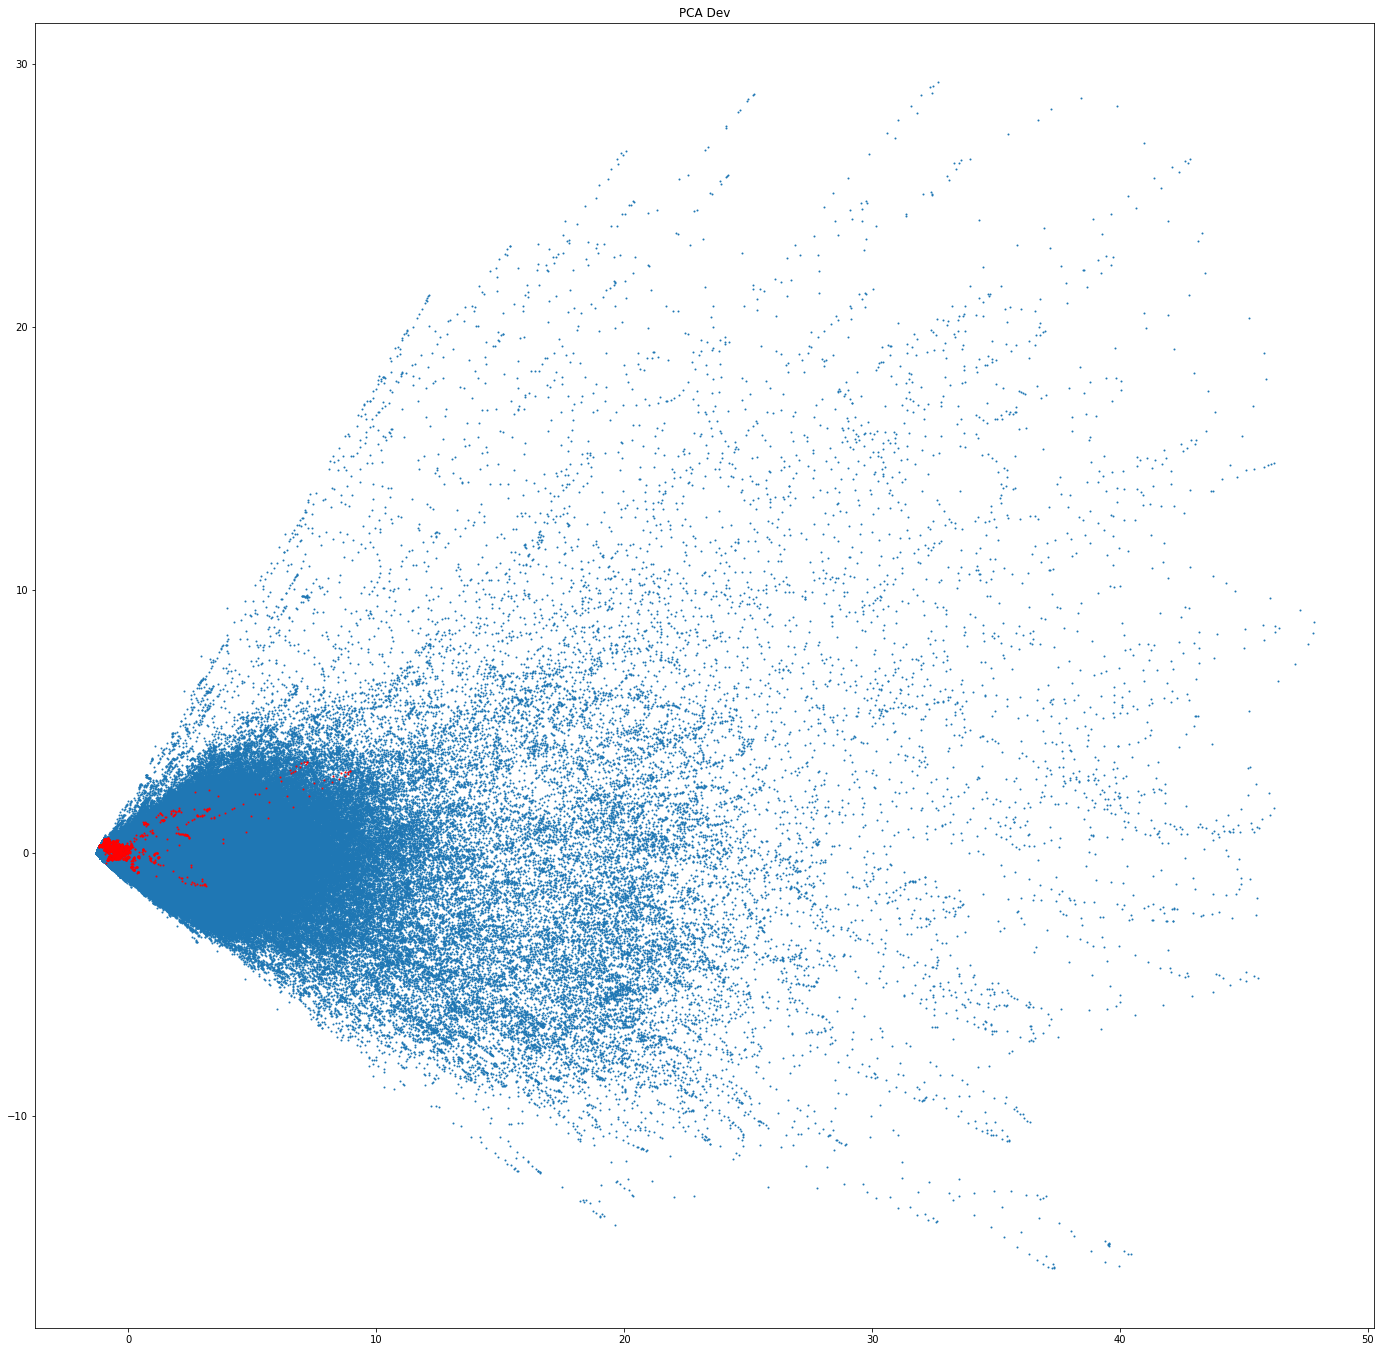

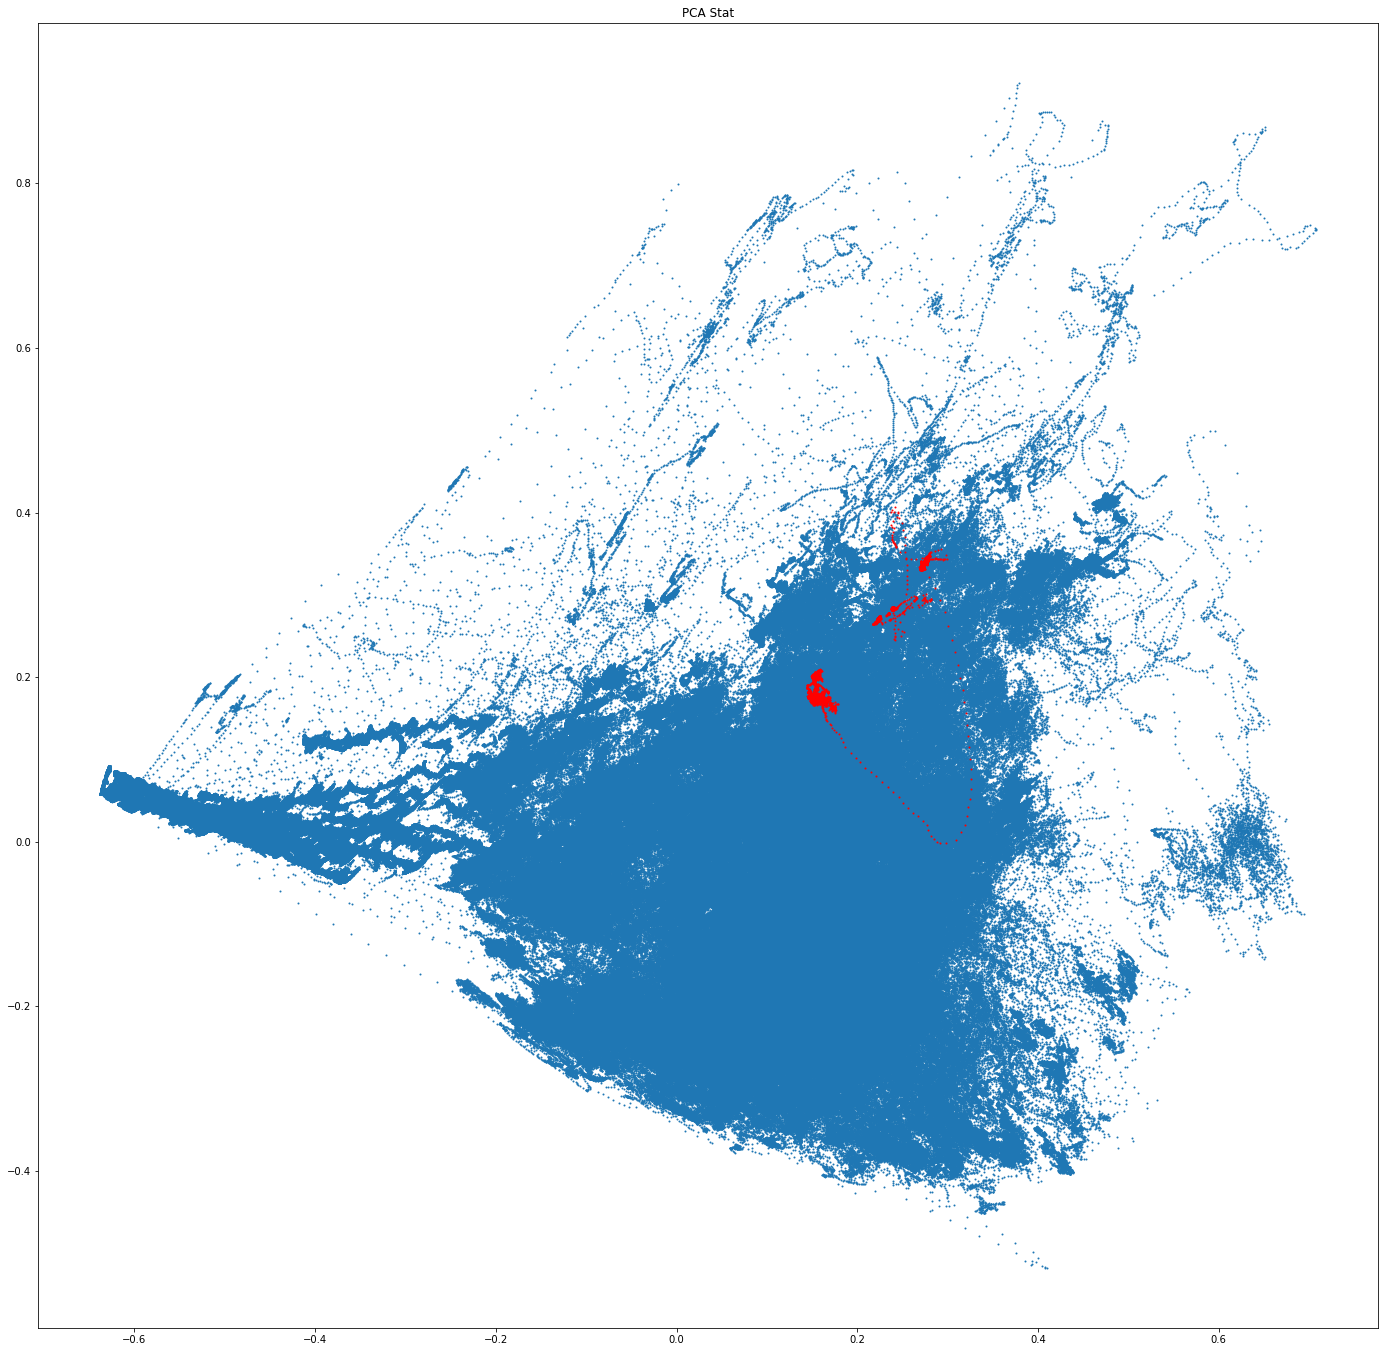

In [ ]:
target = dataE.dropna()['target'].values
notTarget = np.logical_not(target)

sct = [pcaM,pcaD,pcaMD]
tit = ['Mean','Dev','Stat']
for i in range(len(sct)):
    pcaSample = sct[i]#sct[i][np.random.choice(sct[i].shape[0], int(4e4), replace=False), :]
    serie = pd.DataFrame(pcaSample)

    X = pd.Series(serie[0]).loc[notTarget]
    Y = pd.Series(serie[1]).loc[notTarget]

    X_t = pd.Series(serie[0]).loc[target]
    Y_t = pd.Series(serie[1]).loc[target]
    
    plt.figure(figsize=(24,24))
    
    plt.scatter(X,Y,s=1)
    plt.scatter(X_t,Y_t,s=1,c='r')
    plt.title('PCA '+tit[i])

#### Tridimencional

In [ ]:
data = datos.iloc[:,1:13]
pcaB = PCA(n_components=3).fit_transform(data)

In [ ]:
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(111, projection='3d')

pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]
Z = pd.Series(serie[2]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]
Z_t = pd.Series(serie[2]).loc[target]

ax.scatter(X,Y,Z,s=1)
ax.scatter(X_t,Y_t,Z_t,s=1,c='r')
plt.title('PCA Raw')

Text(0.5, 0.92, 'PCA Raw')